<a href="https://colab.research.google.com/github/JoseBatista2010/ML2023-Jose-Batista/blob/master/Limpando_e_Filtrando_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTS DAS BIBLIOTECAS NECESSÁRIAS PARA MANIPULAÇÃO**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use(['ggplot', 'dark_background'])

**PATH PARA O ENDEREÇO DA TABELA NO GOOGLE DRIVE**

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Text(0, 0.5, 'Idade')

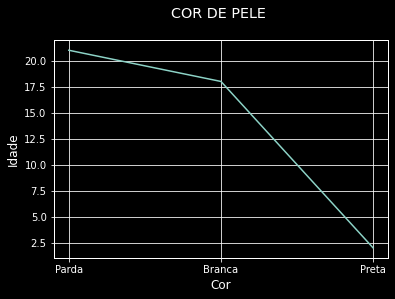

In [35]:
path = '/content/drive/MyDrive/UFC/2023_1/Machine_Learning/Dataset/Feminicidio_2015_2022.xlsx'

df = pd.read_excel(path, sheet_name= 7)
df.fillna("NOT SPECIFIED", inplace=True)
#df['DATA_NASCIMENTO_PESSOA']
df['DATA_NASCIMENTO_PESSOA'] = pd.to_datetime(df['DATA_NASCIMENTO_PESSOA'], errors='coerce')

df['ANO'] = df['DATA_NASCIMENTO_PESSOA'].dt.year
df['MES'] = df['DATA_NASCIMENTO_PESSOA'].dt.month
df['DIA'] = df['DATA_NASCIMENTO_PESSOA'].dt.day

df['MES_BO'] = df['DATAHORA_REGISTRO_BO'].dt.month
df['DIA_BO'] = df['DATAHORA_REGISTRO_BO'].dt.day


df = df.loc[df['MUNICIPIO_CIRCUNSCRICAO'] == 'São Paulo']

plt.plot(df['COR_PELE'].value_counts())
plt.title('COR DE PELE \n')
plt.xlabel('Cor')
plt.ylabel('Idade')

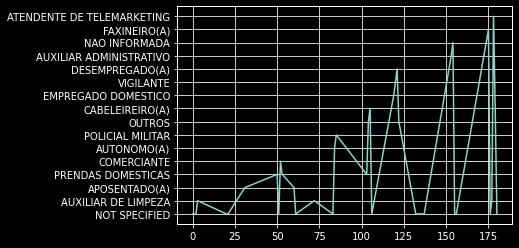

In [36]:
plt.plot(df['PROFISSAO'])


<BarContainer object of 41 artists>

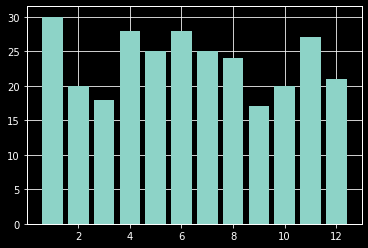

In [24]:
plt.bar(df['MES_BO'], df['DIA_BO'])

In [5]:

df


,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,...,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO,ANO,MES,DIA,MES_BO,DIA_BO
0,DECAP,8ª SEC,São Paulo,054 DP - Cidade Tiradentes,1.0,1,20249,1,2022,2022-01-30 16:02:00,...,1963-08-01,Branca,NOT SPECIFIED,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...,1963.0,8.0,1.0,1,30
1,DECAP,7ª SEC,São Paulo,103 DP - Cohab Itaquera,1.0,1,10326,1,2022,2022-01-04 00:00:00,...,1944-06-22,Branca,NOT SPECIFIED,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...,1944.0,6.0,22.0,1,4
2,DECAP,5ª SEC,São Paulo,018 DP - Alto da Moóca,1.0,1,20218,1,2022,2022-01-10 11:25:00,...,1970-06-07,Parda,NOT SPECIFIED,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...,1970.0,6.0,7.0,1,10
3,DECAP,4ª SEC,São Paulo,074 DP - Jaraguá,1.0,1,20103,1,2022,2022-01-04 00:00:00,...,1974-01-28,Parda,AUXILIAR DE LIMPEZA,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...,1974.0,1.0,28.0,1,4
20,DECAP,6ª SEC,São Paulo,092 DP - Parque Santo Antônio,1.0,1,10247,2,2022,2022-02-09 00:00:00,...,1995-07-25,Branca,NOT SPECIFIED,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...,1995.0,7.0,25.0,2,9
21,DECAP,4ª SEC,São Paulo,073 DP - Jaçanã,1.0,1,10336,2,2022,2022-02-20 00:00:00,...,1984-07-17,Branca,NOT SPECIFIED,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...,1984.0,7.0,17.0,2,20
31,DECAP,7ª SEC,São Paulo,024 DP - Ponte Rasa,1.0,1,20224,3,2022,2022-03-18 00:00:00,...,1967-05-17,Branca,APOSENTADO(A),HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...,1967.0,5.0,17.0,3,18
50,DECAP,7ª SEC,São Paulo,024 DP - Ponte Rasa,1.0,1,20210,4,2022,2022-04-28 00:00:00,...,1986-01-21,Preta,PRENDAS DOMESTICAS,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...,1986.0,1.0,21.0,4,28
51,DECAP,6ª SEC,São Paulo,085 DP - Jardim Mirna,1.0,1,10374,4,2022,2022-04-01 00:00:00,...,1986-05-02,Parda,NOT SPECIFIED,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...,1986.0,5.0,2.0,4,1
52,DECAP,4ª SEC,São Paulo,074 DP - Jaraguá,1.0,1,20103,4,2022,2022-04-11 00:00:00,...,1981-07-22,Branca,COMERCIANTE,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...,1981.0,7.0,22.0,4,11


<Axes: >

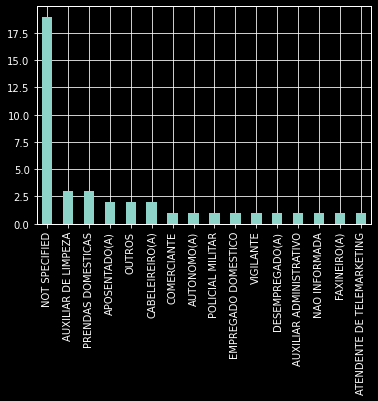

In [43]:
contagem_profissao = df['PROFISSAO'].value_counts()
contagem_profissao.plot(kind='bar')

<Axes: >

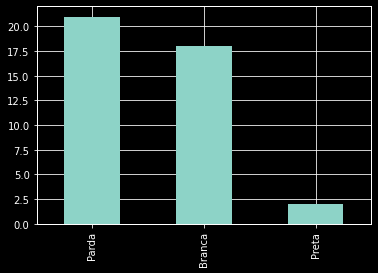

In [44]:
contagem_cor = df['COR_PELE'].value_counts()
contagem_cor.plot(kind='bar')